# Notebook to explore the forecasts produced in local runs
To run the ARIMA pipeline locally:

```shell
mkdir dump
python run_locally.py
```

Edit `config.ini` to suit your needs.

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

# handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# use white grid plot background from seaborn
sns.set(font_scale=1, style="whitegrid")

Load the relevant data files produced by `run_locally.py`.

In [2]:
# this is env data processed with `prepare_data.prepare_data`
with open("dump/env_prepared.pkl", "rb") as handle:
    env_prepared = pickle.load(handle)

In [3]:
# this is the output of the forecasts
with open("dump/temperature_forecast.pkl", "rb") as handle:
    temperature_forecast = pickle.load(handle)

In [4]:
# names of the temperature sensors on which forecasting was performed
sensor_names = list(temperature_forecast.keys())

Plot the sensor signals and the forecasts together for every sensor.
The cell below will save the figures to `dump/`.

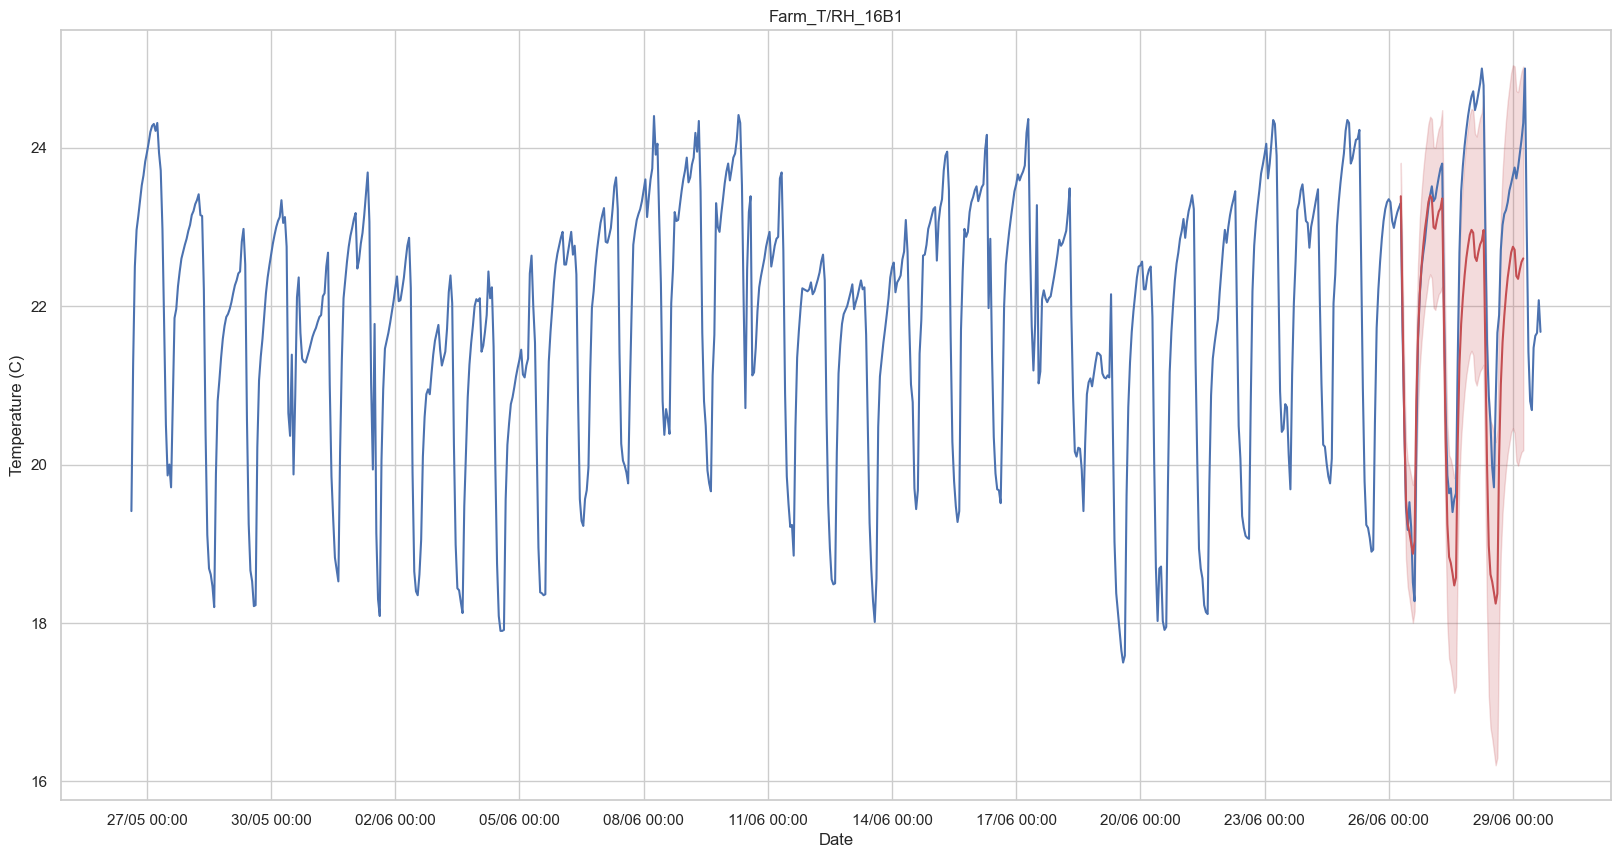

In [5]:
fig, ax = plt.subplots(figsize=(20, 10))
date_form = DateFormatter("%d/%m %H:%M")
for sensor in sensor_names:
    temperature_historical = env_prepared[sensor]["temperature"]
    mean_forecast = temperature_forecast[sensor]["mean_forecast"]
    conf_int = temperature_forecast[sensor]["conf_int"]
    ax.plot(temperature_historical, '-b')
    ax.plot(mean_forecast, '-r')
    ax.fill_between(
        conf_int.index,
        conf_int["mean_ci_lower"],
        conf_int["mean_ci_upper"],
        color="r",
        alpha = .2)
    ax.xaxis.set_major_formatter(date_form) # define the date format
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
    ax.set(
        xlabel="Date",
        ylabel="Temperature (C)",
        title=sensor,
    )
    plt.show()
    fig.savefig("dump/"+sensor.replace("/", "_"))
    ax.cla()